In [1]:
# K-Means is an example of hard clustering, where every point belongs to one cluster.


In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [95]:
X, y = make_blobs(n_samples = 500 , n_features = 2 , centers = 5 , random_state = 3)

In [97]:
print(X.shape)

(500, 2)


In [99]:
#not really need ,as k-means is unsupervised learning
np.unique(y)

array([0, 1, 2, 3, 4])

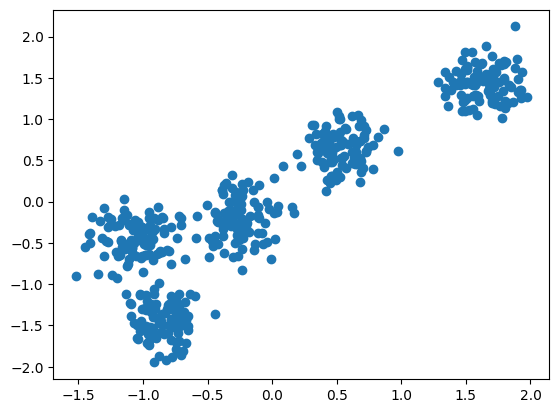

In [101]:
#data normalisation
def normalise(X):
    u = X.mean(axis =0)
    std = X.std(axis = 0)
    return (X-u)/std
X = normalise(X)

plt.scatter(X[:,0],X[:,1]) # the model has to come up with its own colouring in the end
plt.show()

In [188]:
# Initialize the K-centers for k clusters--step-1
k =5
colors = ["green","red","blue","yellow","orange"]
n_features = 2
def init(k):
    centroids = {}
    for i in range(k):
        center = (2 * np.random.random((n_features,))-1)
        print(center)
    
        centroids[i] = {
            'center' : center,
            'color':colors[i],
            'points':[]
        }
    return centroids
centroids = init(k)

[-0.17166087 -0.35258802]
[-0.19791848 -0.02088168]
[0.19679841 0.50822435]
[ 0.85127005 -0.25708418]
[-0.0920504 -0.2477031]


In [190]:
print(centroids)

{0: {'center': array([-0.17166087, -0.35258802]), 'color': 'green', 'points': []}, 1: {'center': array([-0.19791848, -0.02088168]), 'color': 'red', 'points': []}, 2: {'center': array([0.19679841, 0.50822435]), 'color': 'blue', 'points': []}, 3: {'center': array([ 0.85127005, -0.25708418]), 'color': 'yellow', 'points': []}, 4: {'center': array([-0.0920504, -0.2477031]), 'color': 'orange', 'points': []}}


In [192]:
#Step 2a -- update cluster assignments
def dist(p,q):
    return np.sqrt(np.sum((p-q)**2))

def assignPtsToCluster(X,centroids):
    m = X.shape[0]
    # each pt will get assigned to one cluster
    for i in range(m):
        cdist = []
        cx = X[i]
        # find out the dixtance of pt from each cluster
        for kx in range(k):  
            d = dist(centroids[kx]['center'],cx)
            cdist.append(d)

        clusterId = np.argmin(cdist)
        centroids[clusterId]['points'].append(cx)
        
    

In [194]:
assignPtsToCluster(X,centroids)


In [196]:
# step 2b - update the cluster center
def updateClusters(centroids):
    #update every centroid by taking mean of points assigned to that particular cluster
    for kx in range(k):
        pts = np.array(centroids[kx]['points'])

        # if a cluster has non zero points
        if pts.shape[0] > 0:
            newCenter = pts.mean(axis = 0)
            centroids[kx]['centers'] = newCenter
            centroids[kx]['points'] = [] # clear the list for step 2a
            
            

In [198]:
def plotClusters(centroids):
    for kx in range(k):
        pts = np.array(centroids[kx]['points'])
        if pts.shape[0] >0 :
            plt.scatter(pts[:,0],pts[:,1],color = centroids[kx]['color'])
        # plot the cluster center
        mean_k = centroids[kx]['center']
        plt.scatter(mean_k[0],mean_k[1],color = 'black',marker = '*')

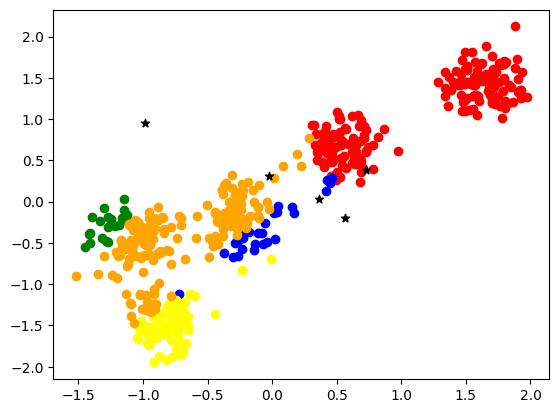

In [320]:
assignPtsToCluster(X,centroids)
plotClusters(centroids)
updateClusters(centroids)